In order to successfully complete this assignment you must:
1. Complete your project proposal
2. The assignment must be submitted to the `milestones` folder in the `cmse802-yourlastname` repository on or before **11:59pm Friday**.  Late assignment will receive <=80% of the grade.

# <center>__Building testing suite for a project__</center>

<img src="https://docs.pytest.org/en/6.2.x/_static/pytest1.png" width=20% alt="pyTest logo">

We are at the halfway mark of the semester and have introduced the idea of unit testing with the `unittest`. At this point, you should have some codes for your projects. While they may be incomplete, __you should think about how you  want to test your codes.__ 

To make your software package bug-free, or at least robust as possible, you should:
1. Add testing classes/methods to your code. 
1. Use modules like [unittest](https://docs.python.org/3/library/unittest.html), [pytest](https://docs.pytest.org/), and [nose](https://pypi.org/project/nose/) (there are more) to test if your current version of the code still performs as intended. 

This is specially important as the code is evolving all the time and with new functionality, old functionality might fail.

The most common reasons for not using these tools is that people **a)** don't know they exist or **b)** the learning curve is too high for using them. Thus, beyond what we have introduced during the unit testing exercises, here you have another opportunity to learn about unit testing. 

---
# Instructions

## Using `pytest`

In the unit testing exercises, you should have `pytest` installed already. If somehow you don't have it, do: 

```conda install pytest```

or 

```pip instsall pytest```

&#9989; <font color=blue>**DO THIS:**</font> Before writing test scripts for pytest, first watch short video about usage of pytest. I skipped the 1st few minutes intro stuff. 

https://youtu.be/_QtM7QGuj1A?t=296

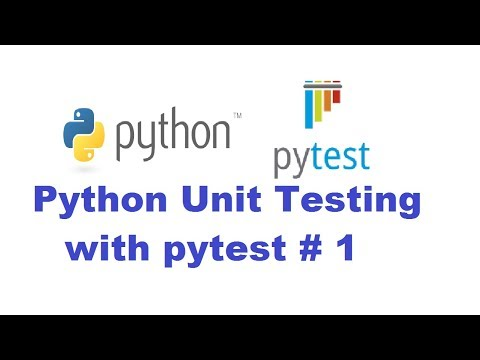

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("_QtM7QGuj1A", start=297, width=640, height=360, cc_load_policy=True)


The above video suggests to store testing script next to (in the same directory) as your Python scripts. However, another good thing to do is create a subdirectory named **_tests_** inside the ```ProjectName-->mysourcename``` directory.

## Short hands-on practice of writing test scripts

The easiest way to learn programming is to learn it firsthand, so lets create simple script for loading "input" file to your code and testing script to test if the function performs as intended. 

Testing can be done for individual objects/classes/methods/functions or of the program as a whole. The best is to test small pieces of codes (classes or functions) first and then later the whole code as the code grows.

&#9989; **<font color=red>Step 1:</font>** For the purpose of the test, create a short Python file named ```read_file.py``` in your code directory. The purpose of the function is to read input for your "simulation". The content of the file is as follows:
```python
import numpy as np 
import os

def read_file(filename):
    '''
        Read input file with given name.
        
        Args:
            filename (string): full path for input file
        Returns:
            (numpy array): the content of the file
    '''
    if not os.path.isfile(filename):
        raise ValueError("Input file does not exist: {0}. I'll quit now.".format(filename))

    # code to load and parse the data from input file
    data = np.loadtxt(filename, delimiter=',')

    if len(data) < 5:
        # there should be 5 rows
        raise ValueError("Not enough rows in input file.")

    return data
```

&#9989; **<font color=red>Step 2:</font>** Following the naming convention for test scripts, create a Python script named ```test_read_file.py``` in directory ```tests```. The test will check if function for loading an input file can handle different input parameters: if the file exists, if the content of the file is not complete, etc. 

The test script will have 3 functions, each testing different functionality of the ```read_file``` function. When testing, 3 tests will be performed and if all goes according to plan, testing should result in **3 tests passed**.

The content of the file is following:

```python 
import read_file
import pytest
import numpy as np 

def test_file_load_good():
    # test if function returns numpy array for good input file.
    data = read_file.read_file("input_good.inp")
    assert type(data) == np.ndarray

def test_file_load_bad():
    # Test if the function raises the exception if nonexisting file name is passed as parameter.
    with pytest.raises(ValueError) as excinfo:
        read_file.read_file("input_bad.inp")

    assert "enough rows in input file" in str(excinfo.value)

def test_file_load_missing_file():
    # Test if the function raises the exception if nonexisting file name is passed as parameter.
    with pytest.raises(ValueError) as excinfo:
        read_file.read_file("non-existing_file.txt")

    assert "file does not exist" in str(excinfo.value)
```


&#9989; **<font color=red>Step 3:</font>** Create following two input files we will use for testing. They should be in the same directory as testing script:

 - file ```input_good.inp```:
```
# header line
1
2
3
4
5
```


 - file ```input_bad.inp```:
```
# header line
1
2
3
4
```


&#9989; **<font color=red>Step 4:</font>** Let's test our code with a test file. Open a terminal, if you haven't it already, and go to testing directory (directory ```tests``` in your project). 

Setup ```PYTHONPATH``` to include directory where your source files are locate, and also newly created ```read_file.py``` - similar as you did when creating documentastion for your project. The command is: 

 - **Linux/Unix/macOS**: ```export PYTHONPATH=<path-to-your-directory>:$PYTHONPATH```
 
 - **Windows** (in Anaconda Shell or Power Shell): ```set Pythonpath=<path-to-your-directory>;%Pythonpath%```
 


When path is set, run test with:

```pytest test_read_file.py```

and the test should output the results of testing in the last line of the input. The line include number of passed and failed tests. In the example above, it should say that 3 tests passed (we had three functions in our test script) - the function ```read_file``` performs as intended.

Two different ways to run the tests:

 - to get more verbose output of test performed, add ```-v``` argument to the **pytest**: ```pytest -v test_read_file.py```
 
 - to run all tests in the ```tests``` directory, run the **pytest** without any parameters: ```pytest``` (or ```pytest -v```)


&#9989; **<font color=red>Step 5:</font>** Now change the Python script in a way, that the test will fail! Run testing with more verbose output (```-v```) to see what is tested and which test failed.

There are many ways to do that, few of them are:

 - try testing input file **input_good.inp** in test function ```test_file_load_bad```. Test now fails. Why?
 - try returning **list** in ```read_file``` instead of **numpy array**. That test now fails.
 
 

## Write a testing script for your project

&#9989; **<font color=red>Step 1:</font>** First **idetify the class/method you wish to test**: that is the core computational method or your code or simple reading in input parameters. For chosen method, define **input parameters** and **expected results** for those parameters. With testing you will ensure the methods will return expected results for certain input parameters.


&#9989; **<font color=red>Step 2:</font>** Write a testing script in directory ```tests``` and confirm that test script can catch errors in the selected function - the same was as in **Step 4** on previous section.


&#9989; **<font color=red>Step 3:</font>** Now you are ready to use pytest to harden your code and reduce the number of bugs!

## Advanced users

If you want to make testing hassle free, create a shell script to setup all necessary paths and run the tests.

Save the following lines in a script to the `tests` directory:

```bash
#!/bin/bash
OLD_PPATH=$PYTHONPATH
export PYTHONPATH=<path_to_the_project>:$PAYTHONPATH

pytest

export PYTHONPATH=$OLD_PPATH
```


## Additional reading - not mandatory!

If you want to learn more about testing, adding options, parameters or pytest fixes, following videos would a good start. They are continuation of video from the beginning of this document:

- Python Unit Testing With Pytest, video 2, 3, and 4


In [ ]:
YouTubeVideo("VKY-0LEmrwk",width=640,height=360,cc_load_policy=1)

In [ ]:
YouTubeVideo("7qMhuVGqGY4",width=640,height=360,cc_load_policy=1)

In [ ]:
YouTubeVideo("JJmTO95AoqE",width=640,height=360,cc_load_policy=1)

In [1]:
import numpy as np
np.sort(np.array(np.random.random((3))))

array([0.36354622, 0.46558481, 0.54551238])

---
# Finally

Once you have done all of the steps above, push all the test functions to gitlab, and put the notebook in the `milestones` folder in the `cmse802-yourlastname` repository.

-----
### Congratulations, you are done!
